<a href="https://colab.research.google.com/github/Sarath-Mohan9469545/computing_lab_exp/blob/main/Defect_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [6]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [7]:
train_dir="/content/drive/MyDrive/casting_data/data/train"
test_dir="/content/drive/MyDrive/casting_data/data/test"
val_dir="/content/drive/MyDrive/casting_data/data/val"

In [8]:
train_data=train_datagen.flow_from_directory(train_dir, target_size=(224, 224), class_mode='binary', batch_size=32,seed=42)
valid_data=valid_datagen.flow_from_directory(val_dir, target_size=(224, 224), class_mode='binary',batch_size=32,seed=42)
test_data=test_datagen.flow_from_directory(test_dir, target_size=(224, 224), class_mode='binary',batch_size=32,seed=42)

Found 3192 images belonging to 2 classes.
Found 398 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [22]:
model_1=tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(filters=10,
                                                           kernel_size=3,
                                                           activation="relu",
                                                           input_shape=(224,224,3)),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.MaxPool2D(pool_size=2,
                                                              padding="valid"),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.Conv2D(10,3,activation="relu"),
                                    tf.keras.layers.MaxPool2D(2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1,activation="sigmoid")
                                    
                                    
                                    
])

In [23]:
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [24]:
history_1=model_1.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data)/32,
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
3/3 [==============================] - 153s 50s/step - loss: 0.7654 - accuracy: 0.5547 - val_loss: 0.5980 - val_accuracy: 0.7236
Epoch 2/5
3/3 [==============================] - 48s 18s/step - loss: 0.5887 - accuracy: 0.7344 - val_loss: 0.5711 - val_accuracy: 0.7236
Epoch 3/5
3/3 [==============================] - 43s 15s/step - loss: 0.6492 - accuracy: 0.6484 - val_loss: 0.5745 - val_accuracy: 0.7236
Epoch 4/5
3/3 [==============================] - 46s 17s/step - loss: 0.5191 - accuracy: 0.7969 - val_loss: 0.5898 - val_accuracy: 0.7236
Epoch 5/5
3/3 [==============================] - 39s 14s/step - loss: 0.6777 - accuracy: 0.6641 - val_loss: 0.5566 - val_accuracy: 0.7236


In [25]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 15.2 MB/s 


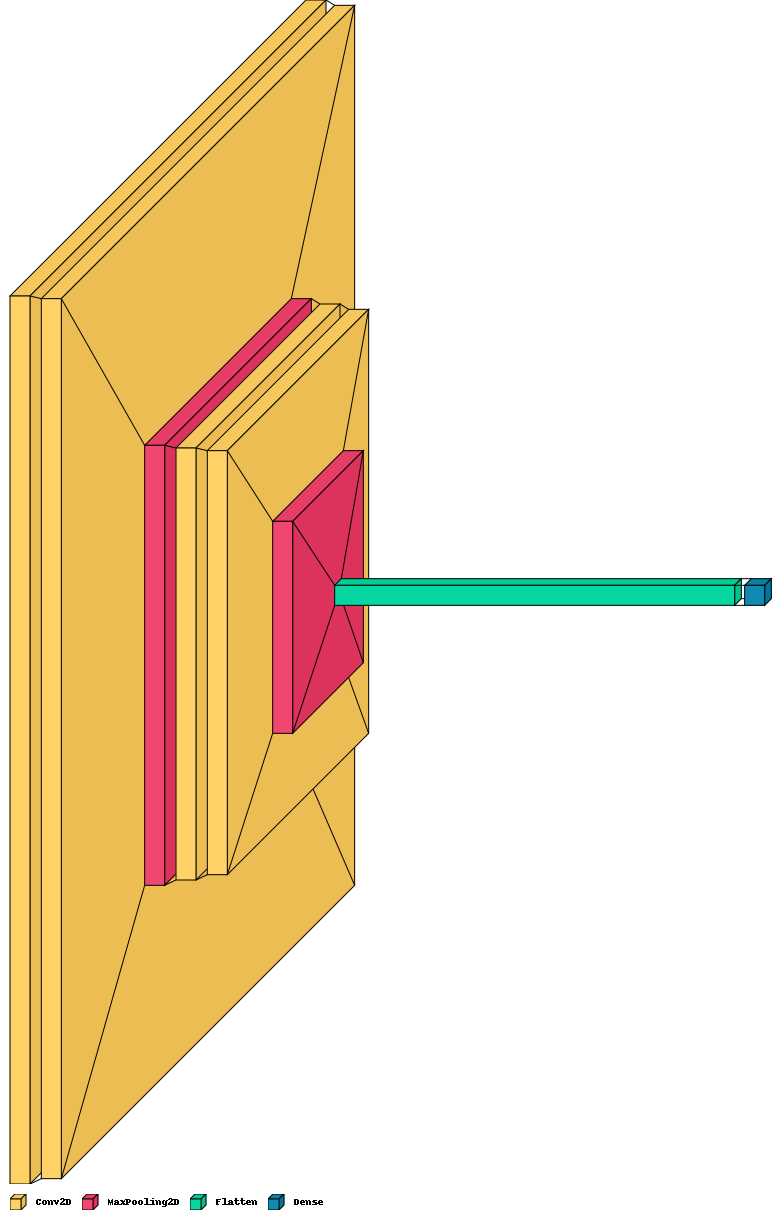

In [27]:
import visualkeras
visualkeras.layered_view(model_1,legend=True)

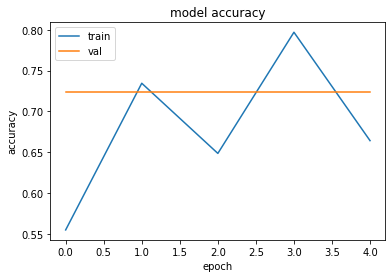

In [29]:
import matplotlib.pyplot as plt
import keras
from matplotlib import pyplot as plt
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

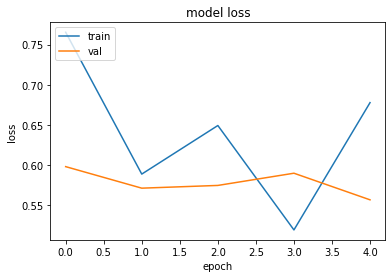

In [31]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [32]:
from tensorflow.keras.preprocessing import image

In [33]:
def predictImage(filename):
  img1=image.load_img(filename,target_size=(224,224))
  plt.imshow(img1)
  Y=image.img_to_array(img1)
  X=np.expand_dims(Y,axis=0)
  val=model_1.predict(X)
  print(val)
  if val==1:
    plt.xlabel("def_front",fontsize=30)
  elif val==0:
    plt.xlabel("ok_front",fontsize=30)  

[[1.]]


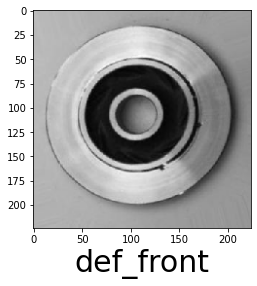

In [34]:
predictImage("/content/drive/MyDrive/casting_data/data/test/def_front/cast_def_0_1086.jpeg")